In [110]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [111]:
data = pd.read_csv(r"CLEAN_DATA/2005-2020_percountry_peryear_final.csv")
country_profiles = pd.read_csv(r"CLEAN_DATA/country_profiles.csv")

In [112]:
# Initialize an empty dictionary to store country profiles
country_profile_dict = {}

# Iterate through each row of the country_profiles_indexed dataframe
for index, row in country_profiles.iterrows():
    # Get the country profile for the current row
    profile = row['Country Profile']
    # Iterate through the list of countries in the current row
    for country_list in row['Country'].split(', '):  # Split the country list by ', '
        # Add the country and its corresponding profile to the dictionary
        country_profile_dict[country_list] = profile

# Map the 'country' column in data dataframe to the 'Country Profile' dictionary
data['Country Profile'] = data['countryname'].map(country_profile_dict)

# Display the updated data dataframe
display(data.head())

,Unnamed: 0.1,Unnamed: 0,countryname,year,rile,stance_positivity_score,gini Coefficient,leading,welfare spending,electoral_dem_ind,GNI,variable_interaction,Country Profile
0,0,0,Sweden,2006,-8.132000,34.300000,0.263525,left,26.408,0.915,4.340743e+11,-2.925581e+15,Country B
1,1,7,Sweden,2010,-4.296375,34.593625,0.277382,left,25.849,0.915,5.092813e+11,-1.790279e+15,Country B
2,2,15,Sweden,2014,-15.754750,54.500250,0.283897,left,26.587,0.916,5.942473e+11,-1.242631e+16,Country B
3,3,23,Sweden,2018,-10.283625,58.764000,0.299742,left,25.633,0.909,5.665538e+11,-7.977412e+15,Country B
4,4,31,Norway,2005,-15.257286,37.567143,0.305976,left,20.737,0.892,3.133711e+11,-3.322424e+15,Country B


In [113]:
#drop first two columns
data = data.drop(data.columns[[0, 1]], axis=1)

In [114]:
data.shape

(148, 11)

In [115]:
# one-hot encode country profiles
data = pd.get_dummies(data, columns=['Country Profile'], drop_first=True)
display(data.head())

,countryname,year,rile,stance_positivity_score,gini Coefficient,leading,welfare spending,electoral_dem_ind,GNI,variable_interaction,Country Profile_Country B,Country Profile_Country C,Country Profile_Country D
0,Sweden,2006,-8.132000,34.300000,0.263525,left,26.408,0.915,4.340743e+11,-2.925581e+15,True,False,False
1,Sweden,2010,-4.296375,34.593625,0.277382,left,25.849,0.915,5.092813e+11,-1.790279e+15,True,False,False
2,Sweden,2014,-15.754750,54.500250,0.283897,left,26.587,0.916,5.942473e+11,-1.242631e+16,True,False,False
3,Sweden,2018,-10.283625,58.764000,0.299742,left,25.633,0.909,5.665538e+11,-7.977412e+15,True,False,False
4,Norway,2005,-15.257286,37.567143,0.305976,left,20.737,0.892,3.133711e+11,-3.322424e+15,True,False,False


In [116]:
data

,countryname,year,rile,stance_positivity_score,gini Coefficient,leading,welfare spending,electoral_dem_ind,GNI,variable_interaction,Country Profile_Country B,Country Profile_Country C,Country Profile_Country D
0,Sweden,2006,-8.132000,34.300000,0.263525,left,26.408,0.915,4.340743e+11,-2.925581e+15,True,False,False
1,Sweden,2010,-4.296375,34.593625,0.277382,left,25.849,0.915,5.092813e+11,-1.790279e+15,True,False,False
2,Sweden,2014,-15.754750,54.500250,0.283897,left,26.587,0.916,5.942473e+11,-1.242631e+16,True,False,False
3,Sweden,2018,-10.283625,58.764000,0.299742,left,25.633,0.909,5.665538e+11,-7.977412e+15,True,False,False
4,Norway,2005,-15.257286,37.567143,0.305976,left,20.737,0.892,3.133711e+11,-3.322424e+15,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Ukraine,2006,4.969600,35.691000,0.297944,right,NaN,0.570,1.060315e+11,NaN,True,False,False
144,Ukraine,2007,-5.364167,43.718667,0.270127,left,NaN,0.601,1.420606e+11,NaN,True,False,False
145,Ukraine,2012,-13.222400,61.245400,0.247407,left,NaN,0.476,1.806028e+11,NaN,True,False,False
146,Ukraine,2014,14.165429,71.512000,0.240254,right,NaN,0.410,1.319775e+11,NaN,True,False,False


In [117]:
data.leading.value_counts()
#make values in the leading variable 1 or 0
data['leading'] = data['leading'].replace('right', 1)
data['leading'] = data['leading'].replace('left', 0)
data['leading'] = data['leading'].astype(int)
data.leading.value_counts()

C:\Users\sebgr\AppData\Local\Temp\ipykernel_8808\4195040618.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['leading'] = data['leading'].replace('left', 0)


leading
0    96
1    52
Name: count, dtype: int64

In [118]:
data

,countryname,year,rile,stance_positivity_score,gini Coefficient,leading,welfare spending,electoral_dem_ind,GNI,variable_interaction,Country Profile_Country B,Country Profile_Country C,Country Profile_Country D
0,Sweden,2006,-8.132000,34.300000,0.263525,0,26.408,0.915,4.340743e+11,-2.925581e+15,True,False,False
1,Sweden,2010,-4.296375,34.593625,0.277382,0,25.849,0.915,5.092813e+11,-1.790279e+15,True,False,False
2,Sweden,2014,-15.754750,54.500250,0.283897,0,26.587,0.916,5.942473e+11,-1.242631e+16,True,False,False
3,Sweden,2018,-10.283625,58.764000,0.299742,0,25.633,0.909,5.665538e+11,-7.977412e+15,True,False,False
4,Norway,2005,-15.257286,37.567143,0.305976,0,20.737,0.892,3.133711e+11,-3.322424e+15,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Ukraine,2006,4.969600,35.691000,0.297944,1,NaN,0.570,1.060315e+11,NaN,True,False,False
144,Ukraine,2007,-5.364167,43.718667,0.270127,0,NaN,0.601,1.420606e+11,NaN,True,False,False
145,Ukraine,2012,-13.222400,61.245400,0.247407,0,NaN,0.476,1.806028e+11,NaN,True,False,False
146,Ukraine,2014,14.165429,71.512000,0.240254,1,NaN,0.410,1.319775e+11,NaN,True,False,False


In [119]:
#rather make these 0 and 1's
data[['Country Profile_Country B', 'Country Profile_Country C', 'Country Profile_Country D']] = data[['Country Profile_Country B', 'Country Profile_Country C', 'Country Profile_Country D']].astype(int)

In [120]:
# linear regression
data.dropna(inplace=True, how='any')
X = data[[
    'rile',
    "stance_positivity_score",
    "welfare spending",
    "electoral_dem_ind",
    "GNI",
    "leading",
    "Country Profile_Country B",
    "Country Profile_Country C",
    "Country Profile_Country D"]]
y = data['gini Coefficient']



# initialize model
model = LinearRegression()

# fit model
model.fit(X,y)

# predict gini values
y_pred = model.predict(X)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)

# Print the coefficients and MSE
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
print("Mean Squared Error:", mse)


Intercept: 0.35464600436629723
Coefficient: 0.0005153255892039455
Mean Squared Error: 0.0009668256698622102


In [121]:
#sumarise model in a table
coefficients = model.coef_
coefficients = np.insert(coefficients, 0, model.intercept_)
coefficients = np.round(coefficients, 4)
columns = ['Intercept'] + list(X.columns)
summary = pd.DataFrame(coefficients, columns, columns=['Coefficient'])
summary

,Coefficient
Intercept,0.3546
rile,0.0005
stance_positivity_score,0.0003
welfare spending,-0.0017
electoral_dem_ind,-0.0195
GNI,0.0000
leading,-0.0054
Country Profile_Country B,-0.0101
Country Profile_Country C,0.0000
Country Profile_Country D,0.0184


In [122]:
coefficients = model.coef_
country_profiles = X.columns

# Create a dictionary to store country profiles and their coefficients
profile_coefficients = dict(zip(country_profiles, coefficients))

# Sort the dictionary by coefficient value
sorted_profile_coefficients = sorted(profile_coefficients.items(), key=lambda x: x[1], reverse=True)

# Print 
for profile, coefficient in sorted_profile_coefficients:
    print(f"Country Profile: {profile}, Coefficient: {coefficient}")


Country Profile: Country Profile_Country D, Coefficient: 0.01835231228048255
Country Profile: rile, Coefficient: 0.0005153255892039455
Country Profile: stance_positivity_score, Coefficient: 0.0003391252829185093
Country Profile: GNI, Coefficient: 9.128717072956787e-15
Country Profile: Country Profile_Country C, Coefficient: 0.0
Country Profile: welfare spending, Coefficient: -0.0016685241801308469
Country Profile: leading, Coefficient: -0.005393121042631267
Country Profile: Country Profile_Country B, Coefficient: -0.010088915703564542
Country Profile: electoral_dem_ind, Coefficient: -0.01947253104570226


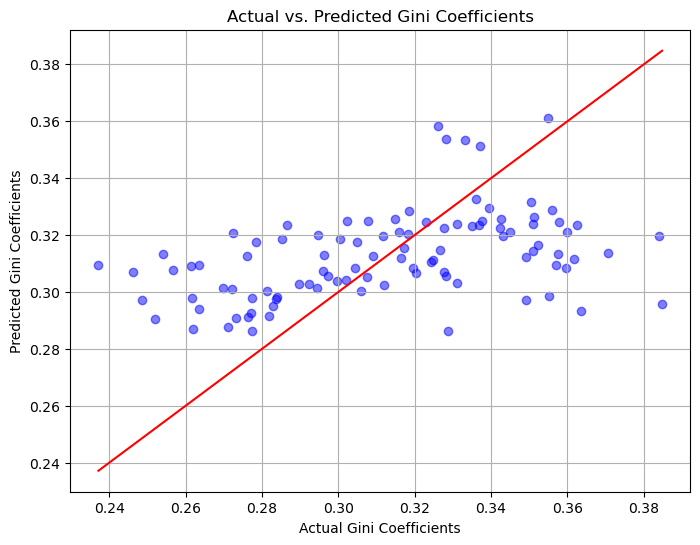

In [123]:
#getting the actual and predicted gini values
y_actual = data['gini Coefficient']

#plotting relationship between actual and predicted values of gini
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, color='blue', alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red')  # Diagonal line for reference
plt.title('Actual vs. Predicted Gini Coefficients')
plt.xlabel('Actual Gini Coefficients')
plt.ylabel('Predicted Gini Coefficients')
plt.grid(True)
plt.show()

### Model with GINI outlier

In [124]:
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = X
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Combine coefficients into a single array for statsmodels
coefficients_statsmodels = np.concatenate(([intercept], coefficients))

# Predict Gini index values on training and testing sets
predicted_gini_train = model.predict(X_train)
predicted_gini_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, predicted_gini_train, squared=False)
test_rmse = mean_squared_error(y_test, predicted_gini_test, squared=False)
train_r2 = r2_score(y_train, predicted_gini_train)
test_r2 = r2_score(y_test, predicted_gini_test)

# Add predicted Gini index to the DataFrame
data['Predicted_Gini'] = model.predict(X)

# Use statsmodels to further analyze the regression
X_with_intercept = sm.add_constant(X)  # Add intercept to X for statsmodels
X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X_with_intercept])
model = sm.OLS(y, X_with_intercept)
results = model.fit()

# Print the summary of the regression results from statsmodels
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       gini Coefficient   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     2.724
Date:                Sat, 25 May 2024   Prob (F-statistic):            0.00973
Time:                        16:07:48   Log-Likelihood:                 205.18
No. Observations:                 100   AIC:                            -392.4
Df Residuals:                      91   BIC:                            -368.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1773      0.031      5.671      0.0

c:\Users\sebgr\.conda\envs\Uni\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


### Model without outlier

In [125]:
# Find the index of the data point with the highest Gini coefficient
highest_gini_index = data['gini Coefficient'].idxmax()
highest_gini_index

data_no_outliers = data.drop(highest_gini_index)
data_no_outliers.shape

(99, 14)

In [126]:
# linear regression
data_no_outliers.dropna(inplace=True, how='any')
X = data_no_outliers[[
    'rile',
    "stance_positivity_score",
    "welfare spending",
    "electoral_dem_ind",
    "GNI",
    "leading",
    "Country Profile_Country B",
    "Country Profile_Country C",
    "Country Profile_Country D"]]
y = data_no_outliers['gini Coefficient']

# initialize model
model = LinearRegression()

# fit model
model.fit(X,y)

# predict gini values
y_pred = model.predict(X)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)

# Print the coefficients and MSE
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
print("Mean Squared Error:", mse)


Intercept: 0.3528857308556666
Coefficient: 0.0006074603424215029
Mean Squared Error: 0.0008930724004384004


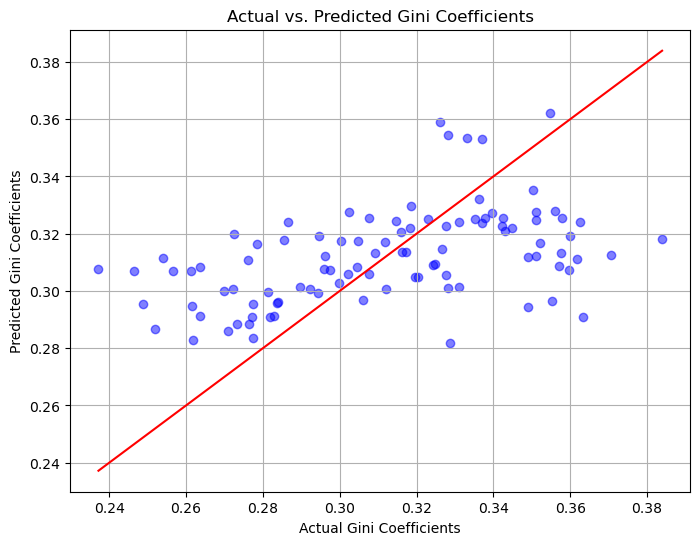

In [127]:
#getting the actual and predicted gini values
y_actual = data_no_outliers['gini Coefficient']

#plotting relationship between actual and predicted values of gini
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, color='blue', alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red')  # Diagonal line for reference
plt.title('Actual vs. Predicted Gini Coefficients')
plt.xlabel('Actual Gini Coefficients')
plt.ylabel('Predicted Gini Coefficients')
plt.grid(True)
plt.show()

In [128]:
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = X
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Combine coefficients into a single array for statsmodels
coefficients_statsmodels = np.concatenate(([intercept], coefficients))

# Predict Gini index values on training and testing sets
predicted_gini_train = model.predict(X_train)
predicted_gini_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, predicted_gini_train, squared=False)
test_rmse = mean_squared_error(y_test, predicted_gini_test, squared=False)
train_r2 = r2_score(y_train, predicted_gini_train)
test_r2 = r2_score(y_test, predicted_gini_test)

# Add predicted Gini index to the DataFrame
data_no_outliers['Predicted_Gini'] = model.predict(X)

# Use statsmodels to further analyze the regression
X_with_intercept = sm.add_constant(X)  # Add intercept to X for statsmodels
X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X_with_intercept])
model = sm.OLS(y, X_with_intercept)
results = model.fit()

# Print the summary of the regression results from statsmodels
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       gini Coefficient   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     3.332
Date:                Sat, 25 May 2024   Prob (F-statistic):            0.00221
Time:                        16:08:03   Log-Likelihood:                 207.06
No. Observations:                  99   AIC:                            -396.1
Df Residuals:                      90   BIC:                            -372.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1764      0.030      5.868      0.0

c:\Users\sebgr\.conda\envs\Uni\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


### Tasks to still complete

* transform our data
* plot the linear regression model for each variable 
* test for collinearity between different variables - and possibly weight them


Below is the linear regression model for each variable

c:\Users\sebgr\.conda\envs\Uni\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


                            OLS Regression Results                            
Dep. Variable:       gini Coefficient   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     3.332
Date:                Sat, 25 May 2024   Prob (F-statistic):            0.00221
Time:                        16:11:00   Log-Likelihood:                 207.06
No. Observations:                  99   AIC:                            -396.1
Df Residuals:                      90   BIC:                            -372.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

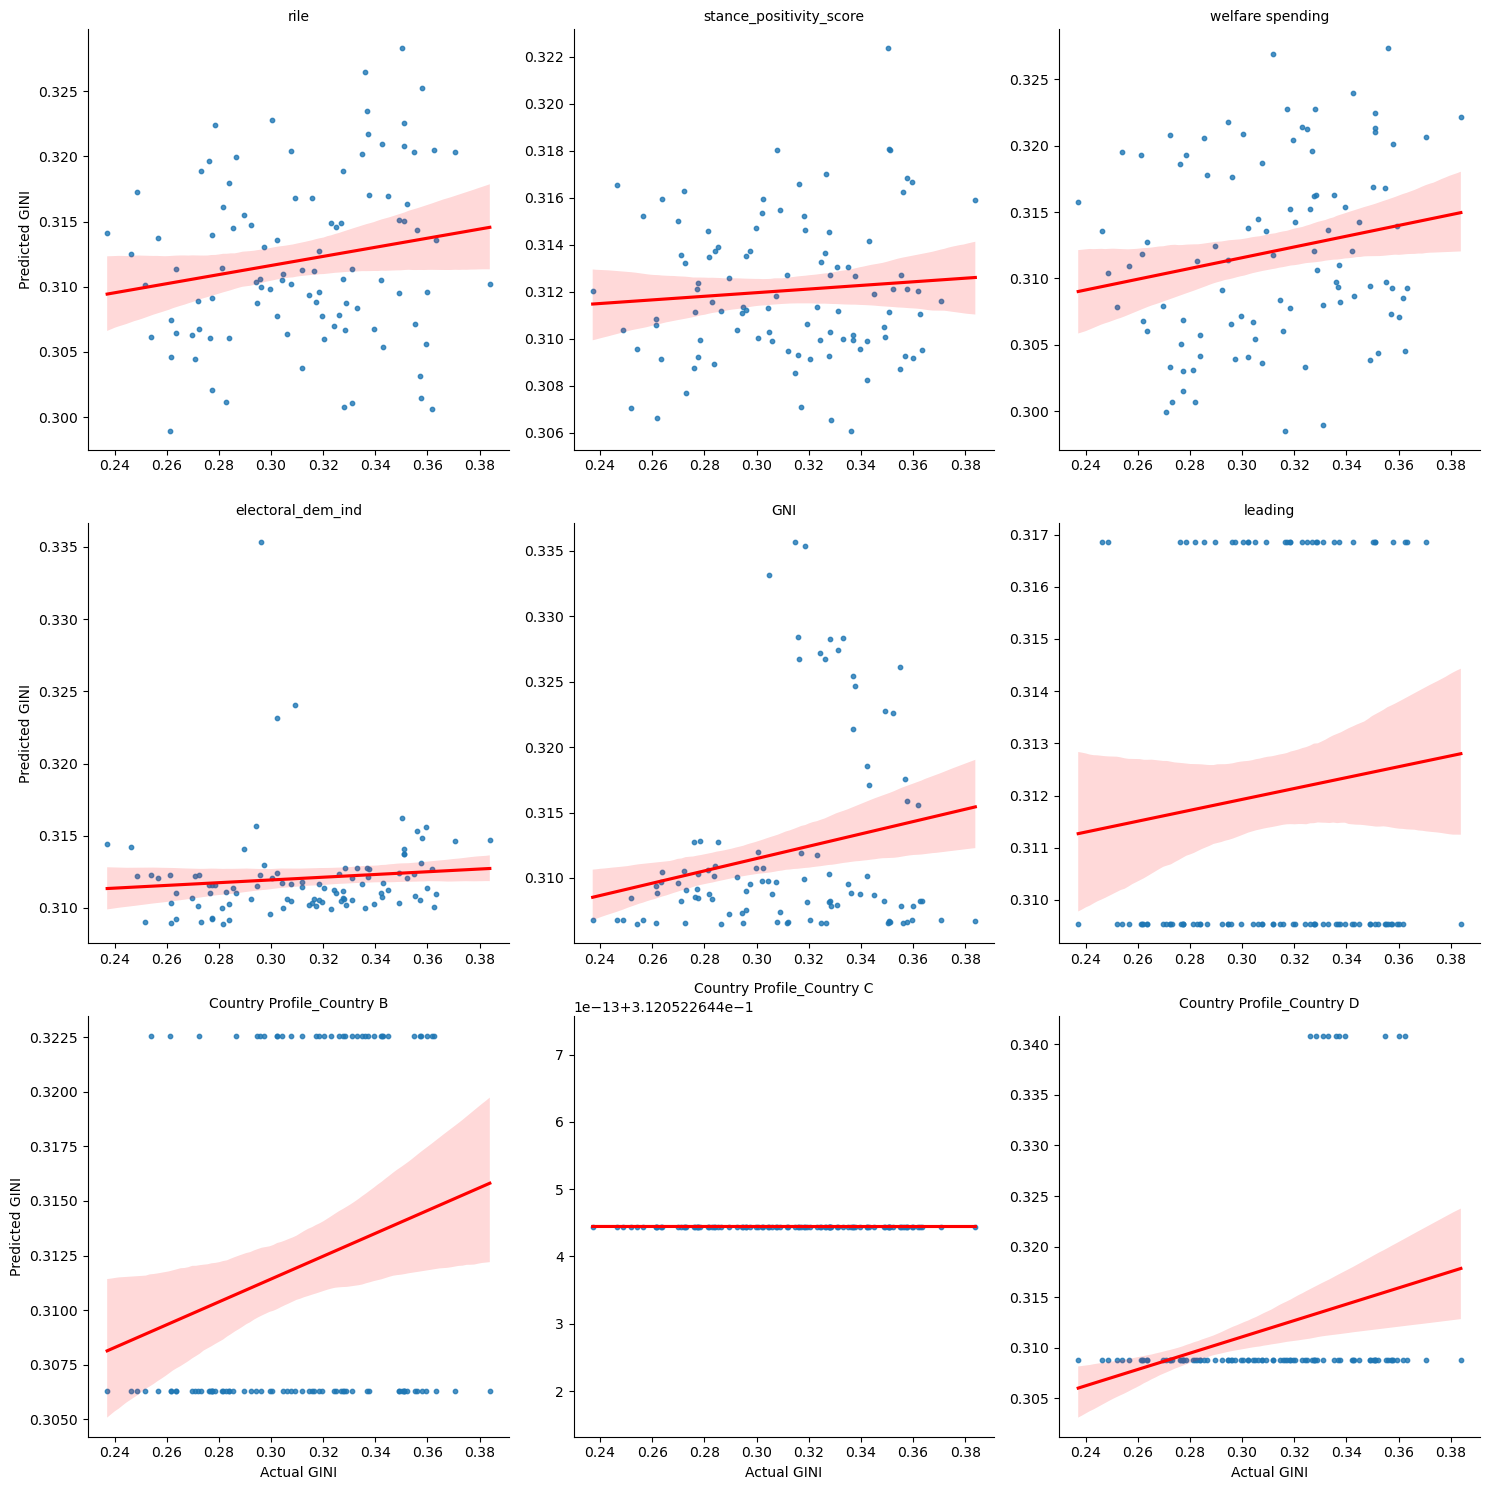

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model for combined model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Combine coefficients into a single array for statsmodels
coefficients_statsmodels = np.concatenate(([intercept], coefficients))

# Predict Gini index values on training and testing sets
predicted_gini_train = model.predict(X_train)
predicted_gini_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, predicted_gini_train, squared=False)
test_rmse = mean_squared_error(y_test, predicted_gini_test, squared=False)
train_r2 = r2_score(y_train, predicted_gini_train)
test_r2 = r2_score(y_test, predicted_gini_test)

# Add predicted Gini index to the DataFrame
data_no_outliers['Predicted_Gini'] = model.predict(X)

# Use statsmodels to further analyze the regression
X_with_intercept = sm.add_constant(X)  # Add intercept to X for statsmodels
model = sm.OLS(y, X_with_intercept)
results = model.fit()

# Print the summary of the regression results from statsmodels
print(results.summary())

# Prepare data for individual models
plot_data = pd.DataFrame({
    'Actual_GINI': y
})

for column in X.columns:
    X_single = X[[column]]
    model_single = LinearRegression()
    model_single.fit(X_single, y)
    predicted_gini = model_single.predict(X_single)
    plot_data[column] = predicted_gini

# Melt the DataFrame for seaborn FacetGrid
plot_data_melted = plot_data.melt(id_vars=['Actual_GINI'], var_name='Predictor', value_name='Predicted_GINI')

# Create the FacetGrid
g = sns.FacetGrid(plot_data_melted, col='Predictor', col_wrap=3, height=5, sharex=False, sharey=False)

# Map the scatter plot to each facet
g.map(sns.regplot, 'Actual_GINI', 'Predicted_GINI', scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add titles and labels
g.set_axis_labels("Actual GINI", "Predicted GINI")
g.set_titles(col_template="{col_name}")

plt.tight_layout()
plt.show()

Below the test for multicollinearity

In [132]:
#Geeks-for-geeks has a nice tutorial on their website on how to do this
#so this is a copy (kind of)
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# the independent variables set 
X = X
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                     feature        VIF
0                       rile   2.141763
1    stance_positivity_score  14.095476
2           welfare spending  31.239058
3          electoral_dem_ind  38.878472
4                        GNI   1.926157
5                    leading   2.025902
6  Country Profile_Country B   3.915608
7  Country Profile_Country C        NaN
8  Country Profile_Country D   1.560701


c:\Users\sebgr\.conda\envs\Uni\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


**Interpreting VIF:**
<br>
VIF = 1: No correlation between the predictor and the other variables.
1 < VIF < 5: Moderate correlation.
VIF >= 5: High correlation.
VIF > 10: Very high correlation, indicating multicollinearity problems.

This is super concerning, will have to redo some of the regression analysis now

### Try logistic regression now

This is a work in progress

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Assuming data_no_outliers is your DataFrame
# Define the feature columns and the target column
features = ['rile', 'stance_positivity_score', 'gini Coefficient', 'welfare spending', 'electoral_dem_ind', 'GNI', 'variable_interaction', 'Country Profile_Country B', 'Country Profile_Country C', 'Country Profile_Country D']
target = 'leading'

# Extract features and target from the DataFrame
X = data_no_outliers[features]
y = data_no_outliers[target]

# Convert boolean columns to numeric
X = X.astype(float)
y = y.astype(int)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
predicted_train = logistic_model.predict(X_train)
predicted_test = logistic_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, predicted_train)
test_accuracy = accuracy_score(y_test, predicted_test)
train_confusion_matrix = confusion_matrix(y_train, predicted_train)
test_confusion_matrix = confusion_matrix(y_test, predicted_test)
train_roc_auc = roc_auc_score(y_train, logistic_model.predict_proba(X_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Add predicted values to the DataFrame
data_no_outliers['Predicted_Leading'] = logistic_model.predict(X)

# Use statsmodels to further analyze the logistic regression
X_with_intercept = sm.add_constant(X)  # Add intercept to X for statsmodels

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X_with_intercept)
results = logit_model.fit()

# Print the summary of the logistic regression results from statsmodels
print(results.summary())

# Print evaluation metrics
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_confusion_matrix)
print("Test Confusion Matrix:\n", test_confusion_matrix)
print("Train ROC AUC:", train_roc_auc)
print("Test ROC AUC:", test_roc_auc)

Optimization terminated successfully.
         Current function value: 0.460622
         Iterations 7


LinAlgError: Singular matrix